In [ ]:
# Assumption Checking
# Evaluating Reliability of Inferential ANOVA Methods
## Dr Austin R Brown
## School of Data Science and Analytics
### Kennesaw State University

In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#    print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📂 Changed directory to: d:\KSU\Teaching\STAT 7220\STAT-7220-Applied-Experimental-Design\STAT-7220-Applied-Experimental-Design\Comparative Experiments


### Introduction

- So far, we have discussed how to perform comparative experiments using a completely randomized design (CRD).

- The specific inferential methods we have used are the independent means $t$-test and the one-way ANOVA method.

- When we first introduced these methods, we had said there are a few assumptions which need to be reasonably met in order for us to feel confident in the results we draw from the $F$ and Post-Hoc tests, respecitvely.

- Because an independent means $t$-test is a special case of the one-way ANOVA, the assumptions for the $t$-test are the same as the one-way ANOVA.

#### One-Way ANOVA Assumptions

- Specifically, the assumptions for the one-way ANOVA are:

    1.  The populations from which the samples are drawn are normally distributed.
    2.  The populations from which the samples are drawn have equal variances.
    3.  The observations are independent of one another.

##### Assumptions for One-Way ANOVA: Normality

- The first assumption is that the populations from which the samples are drawn are normally distributed.

- Recall that:

$$ \varepsilon_{ij} \sim N(0, \sigma^2) $$

- This means that the residuals are normally distributed with a mean of 0 and a constant variance term, $\sigma^2$.

- This tells us that we can check the normality assumption by examining the residuals.

- Generally when performing any assumption test, I recommend using a **graphical** method in addition to a formal **inferential** test.

- The most common graphical method is the *Q-Q plot*.

###### The Q-Q Plot

- The Q-Q Plot is a graphical method for comparing the theoretical and empirical probability distributions of the residuals by plotting their quantiles against each other in a scatterplot format.

- If the residuals are normally distributed, the points on the Q-Q plot will fall along a straight, positively sloped line.

- If the residuals are not normally distributed, the points will deviate from the straight line.

- Let's use the Egg Rating example data to build a Q-Q plot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Technique  90 non-null     object
 1   Rating     90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
None


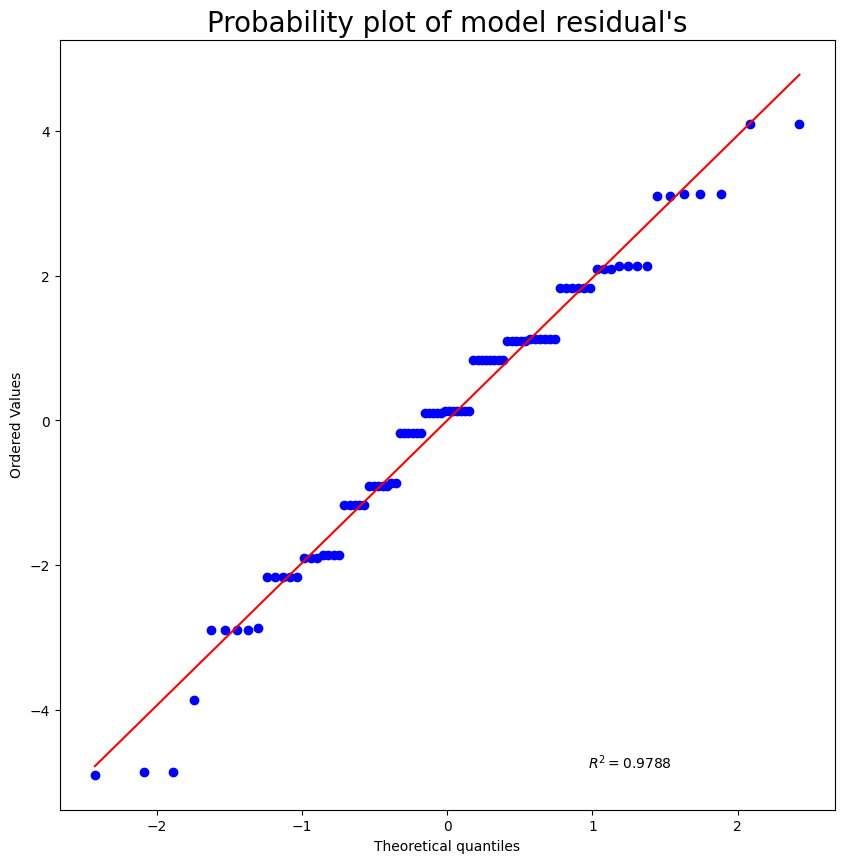

In [10]:
## Import Libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Install scipy package ##

#%pip install scipy ##

## Import scipy ##

import scipy.stats as stats

## Import Egg Rating Data ##

egg_data = pd.read_excel("Egg Rating.xlsx")

## Data Integrity Check ##

print(egg_data.info())

## Fit One Way ANOVA Model ##

egg_mod = ols("Rating~Technique",data=egg_data).fit()

## Extract Model Residuals ##

residuals = egg_mod.resid

## Generate QQ plot ##

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()


- Let's breakdown the code and then we'll discuss how to interpret this result:

    - `plt.figure(figsize=(10,10))` creates a new figure window for plotting, similar to when how we specified the boxplot using `seaborn`. `figsize=(10,10)` sets the width and height of the figure in inches.
    - `fig.add_subplot(111)` adds a signle subplot to the figure. The `111` means, 1 row, 1 columns ,and this is the 1st subplot.
        - This is useful when you want to organize multiple plots in a grid layout (similar to `par` in R).
    - `stats.probplot(residuls,plot=plt,rvalue=True)` generates a QQ plot.
        - `plot=plt` tells Python to use `Matplotlib` for plotting
        - `rvalue=True` tells Python to include the $R^2$ between the theoretical and empirical quantiles.
    - `ax.set_title` and `plt.show` do what it sounds like they do

- As we can see, most of the points fall near the line bisecting the graph.

- While we do have some deviation, it doesn't seem to be substantial nor a large number of points.

- Thus, I would conclude that the Q-Q plot gives us evidence in support of the normality assumption.
    -   Note, this can be subjective!

